<a href="https://colab.research.google.com/github/Eslem-akmn/Karmasik-Ag-Analizi-/blob/main/KAA_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities, modularity
import numpy as np

In [5]:
# 1-InputFileNodes dosyasında ID sütunu düğüm isimleri olacak.
nodes_df = pd.read_csv('InputFileNodes.csv')
nodes_df['id'] = nodes_df['id'].astype(str)

# 2-InputFileEdges dosyasında from ve to sütunları kenarları oluşturacak
edges_df = pd.read_csv('InputFileEdges.csv')
edges_df['from'] = edges_df['from'].astype(str)
edges_df['to'] = edges_df['to'].astype(str)

In [7]:
# 3-Tekrar eden kenarlar birleştirilecek
if 'weight' in edges_df.columns:
    edges_grouped = edges_df.groupby(['from', 'to']).agg({'weight': 'sum'}).reset_index()
else:
    edges_grouped = edges_df[['from', 'to']].drop_duplicates()
    edges_grouped['weight'] = 1

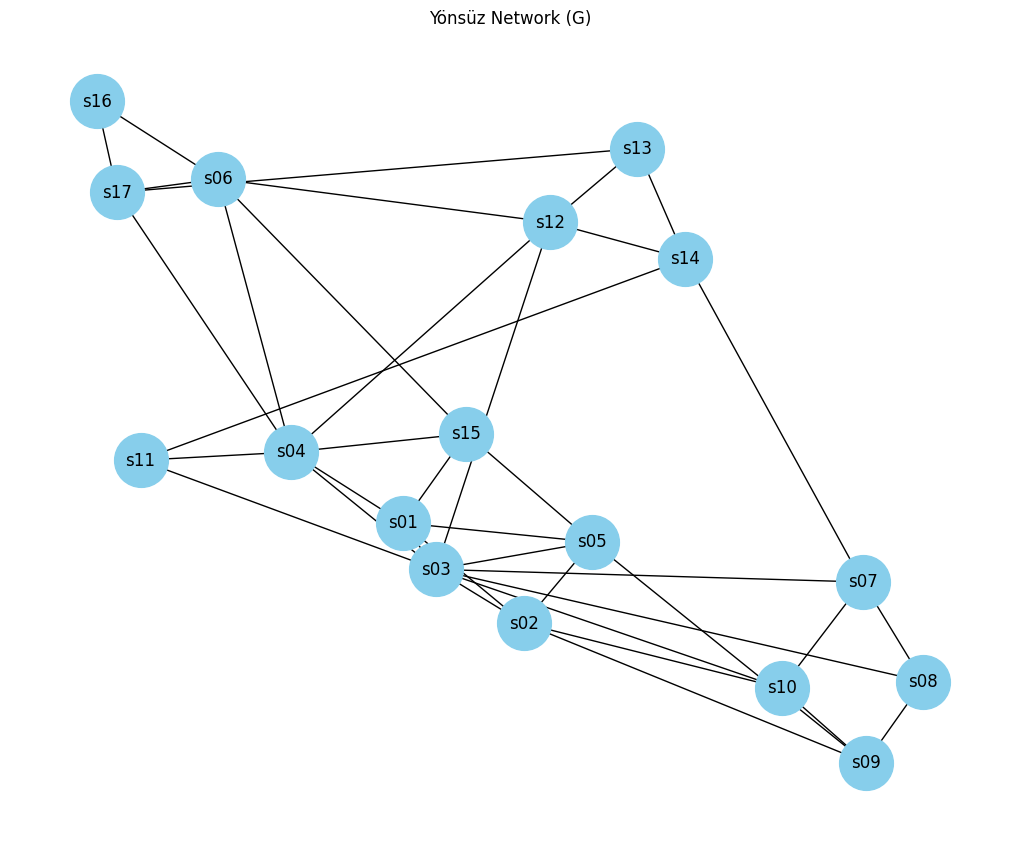

In [8]:
# 4-Yönsüz Network oluşturulacak ve çizdilecek(network ismi G)
G = nx.Graph()
for _, row in nodes_df.iterrows():
    G.add_node(row['id'], **row.to_dict())
for _, row in edges_grouped.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['weight'])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500)
plt.title("Yönsüz Network (G)")
plt.savefig("G_network.png")
plt.show()

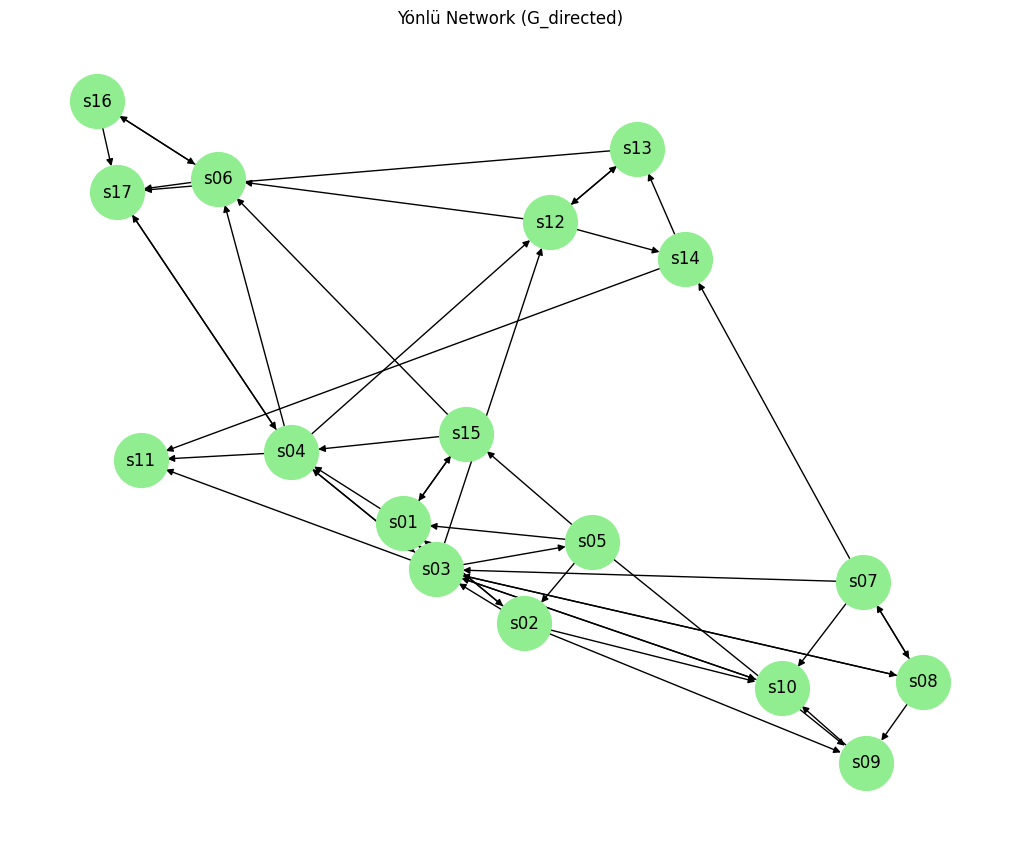

In [9]:
# 5-Yönlü Network oluşturulacak ve çizdilecek(network ismi G_directed)
G_directed = nx.DiGraph()
for _, row in nodes_df.iterrows():
    G_directed.add_node(row['id'], **row.to_dict())
for _, row in edges_grouped.iterrows():
    G_directed.add_edge(row['from'], row['to'], weight=row['weight'])

plt.figure(figsize=(10, 8))
nx.draw(G_directed, pos, with_labels=True, node_color='lightgreen', node_size=1500, arrows=True)
plt.title("Yönlü Network (G_directed)")
plt.savefig("G_directed_network.png")
plt.show()

Düğüm Dereceleri: {'s01': 5, 's02': 5, 's03': 9, 's04': 7, 's05': 5, 's06': 5, 's07': 4, 's08': 3, 's09': 4, 's10': 4, 's11': 3, 's12': 5, 's13': 3, 's14': 4, 's15': 4, 's16': 2, 's17': 4}
Ortalama Derece: 4.4706


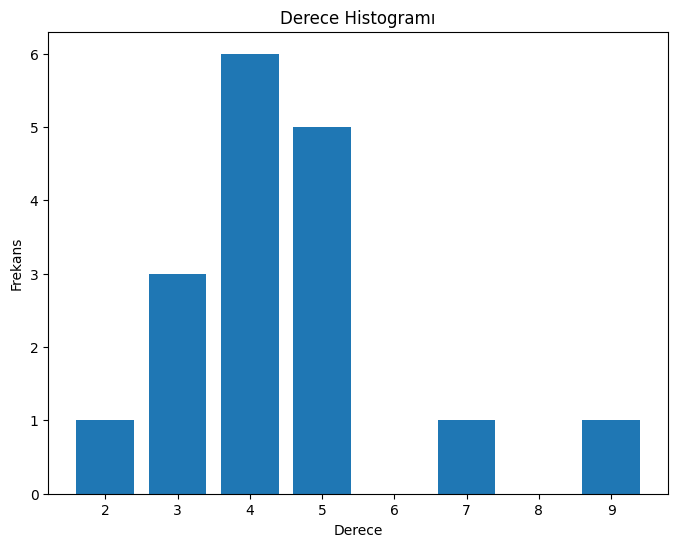

In [10]:
# 6-G network için tüm düğümlerin dereceleri listelenecek
degrees = dict(G.degree())
print("Düğüm Dereceleri:", degrees)

# 7-G network için ortalama derece hesaplanacak
avg_degree = sum(degrees.values()) / len(G)
print(f"Ortalama Derece: {avg_degree:.4f}")

# 8-G network için histogram çizdirilecek
degree_values = list(degrees.values())
plt.figure(figsize=(8, 6))
plt.hist(degree_values, bins=range(min(degree_values), max(degree_values) + 2), align='left', rwidth=0.8)
plt.title("Derece Histogramı")
plt.xlabel("Derece")
plt.ylabel("Frekans")
plt.savefig("degree_histogram.png")
plt.show()

In [11]:
# 9-Degree centrality
degree_cent = nx.degree_centrality(G)
print("Degree Centrality:", degree_cent)

# 10-Closeness centrality
closeness_cent = nx.closeness_centrality(G)
print("Closeness Centrality:", closeness_cent)

# 11-Betweenness centrality
betweenness_cent = nx.betweenness_centrality(G)
print("Betweenness Centrality:", betweenness_cent)

# 12-Eigenvector centrality
eigenvector_cent = nx.eigenvector_centrality(G, max_iter=1000)
print("Eigenvector Centrality:", eigenvector_cent)

# 13-Katz centrality
katz_cent = nx.katz_centrality(G, max_iter=1000, normalized=True)
print("Katz Centrality:", katz_cent)

# 14-PageRank centrality
pagerank_cent = nx.pagerank(G)
print("PageRank Centrality:", pagerank_cent)

Degree Centrality: {'s01': 0.3125, 's02': 0.3125, 's03': 0.5625, 's04': 0.4375, 's05': 0.3125, 's06': 0.3125, 's07': 0.25, 's08': 0.1875, 's09': 0.25, 's10': 0.25, 's11': 0.1875, 's12': 0.3125, 's13': 0.1875, 's14': 0.25, 's15': 0.25, 's16': 0.125, 's17': 0.25}
Closeness Centrality: {'s01': 0.5333333333333333, 's02': 0.48484848484848486, 's03': 0.6666666666666666, 's04': 0.6153846153846154, 's05': 0.5161290322580645, 's06': 0.5, 's07': 0.48484848484848486, 's08': 0.45714285714285713, 's09': 0.41025641025641024, 's10': 0.47058823529411764, 's11': 0.5161290322580645, 's12': 0.5714285714285714, 's13': 0.43243243243243246, 's14': 0.47058823529411764, 's15': 0.48484848484848486, 's16': 0.35555555555555557, 's17': 0.45714285714285713}
Betweenness Centrality: {'s01': 0.039146825396825395, 's02': 0.025992063492063486, 's03': 0.3404166666666666, 's04': 0.19566468253968256, 's05': 0.0654563492063492, 's06': 0.10018849206349206, 's07': 0.050277777777777775, 's08': 0.019593253968253968, 's09': 0.0

In [13]:
# 15-G network için modularity hesaplanacak
communities = list(greedy_modularity_communities(G))
modularity_score = modularity(G, communities)
print(f"Modularity: {modularity_score:.4f}")

# 16- G network için density hesaplanacak
density = nx.density(G)
print(f"Density: {density:.4f}")

# 17- G network için average clustering hesaplanacak
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering: {avg_clustering:.4f}")

# 18- G network için diameter hesaplanacak
if nx.is_connected(G):
    diameter = nx.diameter(G)
else:
    largest_cc = max(nx.connected_components(G), key=len)
    diameter = nx.diameter(G.subgraph(largest_cc))
print(f"Diameter: {diameter}")

Modularity: 0.3373
Density: 0.2794
Average Clustering: 0.4206
Diameter: 4


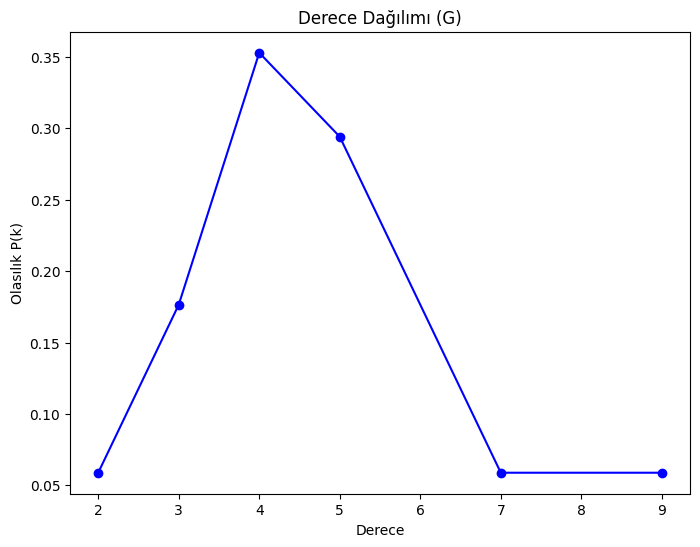

In [14]:
# 19-G network için derece dağılımı hesaplanacak ve çizdirilecek
deg_counts = pd.Series(degree_values).value_counts().sort_index()
deg_probs = deg_counts / len(G)

plt.figure(figsize=(8, 6))
plt.plot(deg_probs.index, deg_probs.values, 'bo-')
plt.title("Derece Dağılımı (G)")
plt.xlabel("Derece")
plt.ylabel("Olasılık P(k)")
plt.savefig("G_degree_distribution.png")
plt.show()

In [15]:
# 21-G network için En Kritik 5 'Köprü' Düğümü sıralayınız (Betweenness)
top_bridges = sorted(betweenness_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("En Kritik 5 Köprü Düğüm:", top_bridges)

# 22-G network için En Kritik 5 'Lider ' Düğümü sıralayınız (Degree)
top_leaders = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("En Kritik 5 Lider Düğüm:", top_leaders)

En Kritik 5 Köprü Düğüm: [('s03', 0.3404166666666666), ('s04', 0.19566468253968256), ('s12', 0.12271825396825398), ('s06', 0.10018849206349206), ('s05', 0.0654563492063492)]
En Kritik 5 Lider Düğüm: [('s03', 0.5625), ('s04', 0.4375), ('s01', 0.3125), ('s02', 0.3125), ('s05', 0.3125)]


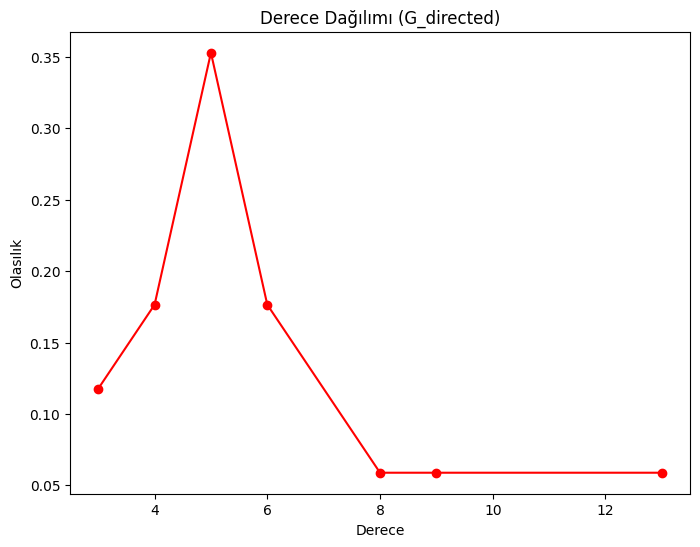

In [16]:
# 23-G_directed network için derece dağılımı hesaplanacak ve çizdirilecek
directed_degrees = [d for n, d in G_directed.degree()] # Toplam derece
dir_deg_counts = pd.Series(directed_degrees).value_counts().sort_index()
dir_deg_probs = dir_deg_counts / len(G_directed)

plt.figure(figsize=(8, 6))
plt.plot(dir_deg_probs.index, dir_deg_probs.values, 'ro-')
plt.title("Derece Dağılımı (G_directed)")
plt.xlabel("Derece")
plt.ylabel("Olasılık")
plt.savefig("G_directed_degree_distribution.png")
plt.show()

Kaldırılan Düğümler: ['s03', 's04', 's01']


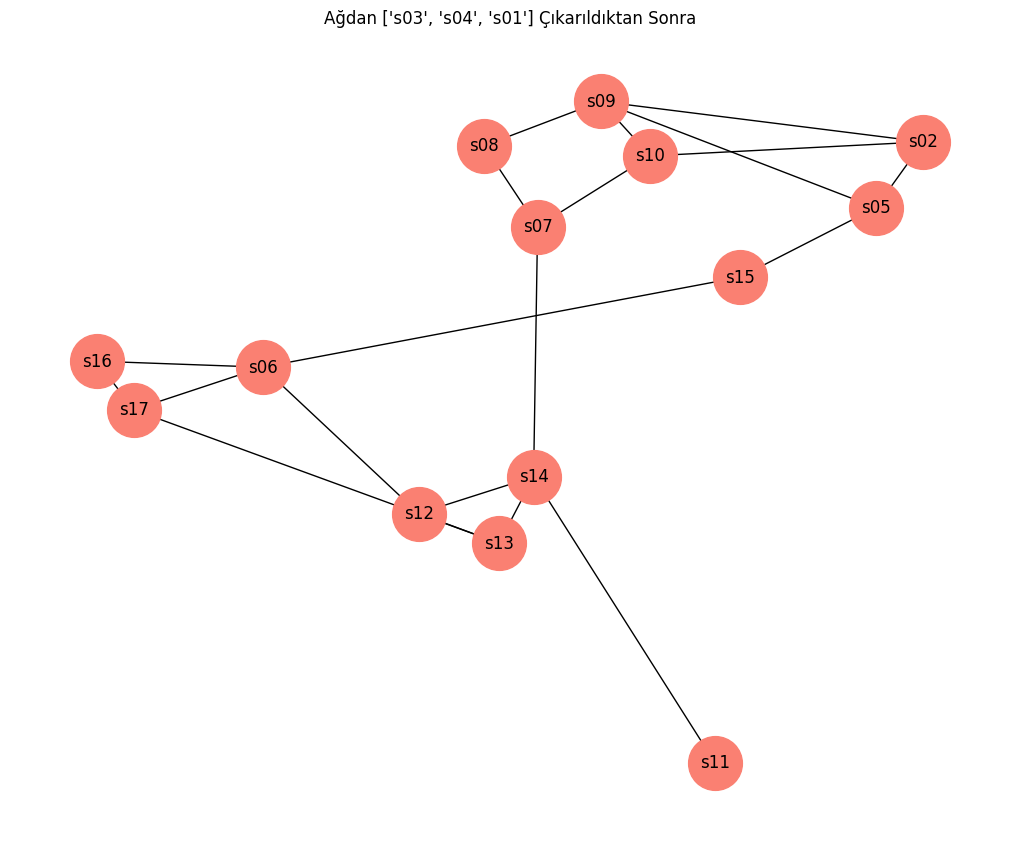

In [17]:
# 24- G network için en güçlü 3 düğümü bularak ağdan kaldırınız ve çizdiriniz
top_3_strongest = [n for n, c in top_leaders[:3]]
print(f"Kaldırılan Düğümler: {top_3_strongest}")

G_removed = G.copy()
G_removed.remove_nodes_from(top_3_strongest)

plt.figure(figsize=(10, 8))
pos_removed = nx.spring_layout(G_removed, seed=42)
nx.draw(G_removed, pos_removed, with_labels=True, node_color='salmon', node_size=1500)
plt.title(f"Ağdan {top_3_strongest} Çıkarıldıktan Sonra")
plt.savefig("G_removed.png")
plt.show()